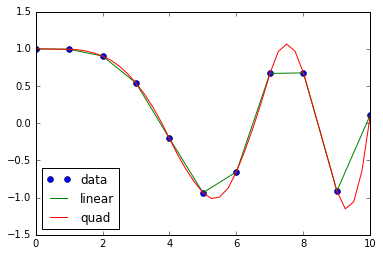

In [29]:
from scipy.interpolate import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, num=11)
y = np.cos(-x**2/9.0)
plt.plot(x, y, 'o')
f1 = interp1d(x, y)
f2 = interp1d(x, y, kind=2)
xn = np.linspace(0, 10, num=41)
plt.plot(xn, f1(xn), xn, f2(xn))
plt.legend(['data', 'linear', 'quad'], loc='best')
# 

In [30]:
from scipy.optimize import minimize
def ucelovka(x):
    return (x[0]-2.0)**2 + (x[1]+3.0)**2

x0 = [0.0, 0.0]
vysledok = minimize(ucelovka, x0)
print(vysledok)

      fun: 4.3136529750579557e-16
 hess_inv: array([[ 0.84615384,  0.23076923],
       [ 0.23076923,  0.65384616]])
      jac: array([ -1.71968599e-08,  -1.14650716e-08])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([ 1.99999998, -3.00000001])


In [33]:
def ineq1(x):
    return x[0] - x[1]
def eq1(x):
    return 2*x[0] - x[1]
ohranicenia = [{'type': 'ineq', 'fun': ineq1 },
               {'type': 'eq', 'fun': eq1}]
x0 = [0.0, 0.0]
vysledok = minimize(ucelovka, x0, constraints=ohranicenia)
print(vysledok)
print(vysledok.x)

     fun: 9.7999999999999989
     jac: array([-5.5999999 ,  2.80000007,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 9
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([-0.8, -1.6])
[-0.8 -1.6]


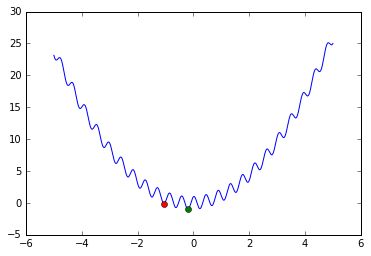

In [8]:
from scipy.optimize import *
import numpy as np
import matplotlib.pyplot as plt
def f(x):
    return np.cos(14.5*x - 0.3) + (x + 0.2)*x
x0 = 2.5
lok = minimize(f, x0)
glob = basinhopping(f, x0)

x = np.linspace(-5, 5, num=1000)
plt.plot(x, f(x), 
         lok.x, lok.fun, 'ro',
         glob.x, glob.fun, 'go')

In [44]:
from scipy.optimize import linprog
c = [1, -4]
A = [ [-3, 1], [1, 2], [0, -1] ]
b = [6, 4, 3]
vysledok = linprog(c, A_ub=A, b_ub=b)
print(vysledok)

     fun: -8.0
 message: 'Optimization terminated successfully.'
     nit: 1
   slack: array([ 4.,  0.,  5.])
  status: 0
 success: True
       x: array([ 0.,  2.])


[ 2.19446983  1.6103342   0.80168012]


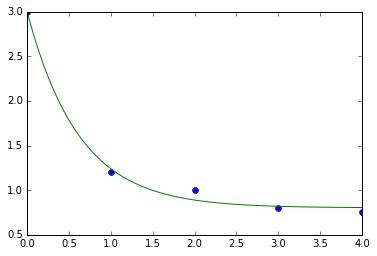

In [50]:
from scipy.optimize import curve_fit
def funkcia(x, a, b, c):
    # fitovacia funkcia s parametrami a, b, c
    return a*np.exp(-b*x) + c
x = [0.0, 1.0, 2.0, 3.0, 4.0]
y = [3.0, 1.2, 1.0, 0.8, 0.75]
p, _ = curve_fit(funkcia, x, y)
print(p)
xn = np.linspace(0, 4, num=100)
plt.plot(x, y, 'o', xn, funkcia(xn, *p))

[ 1.  3.  3.]
[[ 0.          0.        ]
 [ 0.26424112  0.10363832]
 [ 0.32975303  0.43770281]
 [ 0.07473702  0.65577505]
 [-0.189427    0.59028793]]


TypeError: unsupported operand type(s) for *: 'StateSpace' and 'StateSpace'

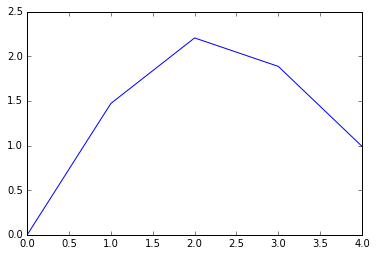

In [97]:
from scipy import signal
tf = signal.TransferFunction([1, 3, 3], [1, 2, 1])
print(tf.num)
# t, y = signal.step(tf)
# t, y = signal.step(tf, T=n7p.linspace(0, 10))
# t, y = signal.impulse(tf, T=np.linspace(0, 10))
t, y = signal.impulse(tf)
# t, y = signal.step(tf)
# plt.plot(t, y)
U = [0.0, 1.0, 1.0, 0.5, 0.0]
T = [0, 1, 2, 3, 4]
# T = np.linspace(0, 20)
t, y, z = signal.lsim(tf, U, T)
plt.plot(t, y)
print(z)


StateSpace(
array([[0, 1],
       [0, 0]]),
array([[0],
       [1]]),
array([[1, 0]]),
array([[0]])
)
[ 1.  0.  0.]
TransferFunction(
array([ 1.]),
array([ 1.,  0.,  0.])
)
StateSpace(
array([[-0., -0.],
       [ 1.,  0.]]),
array([[ 1.],
       [ 0.]]),
array([[ 0.,  1.]]),
array([[ 0.]])
)


/opt/conda/lib/python3.5/site-packages/scipy/signal/filter_design.py:1057: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


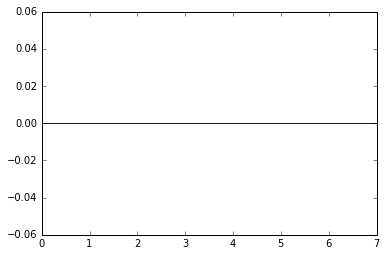

In [96]:
A = [ [0, 1], [0, 0] ]
B = [ [0], [1] ]
C = [ [1, 0] ]
D = [ [0] ]
sys = signal.StateSpace(A, B, C, D)
print(sys)
tf = sys.to_tf()
print(tf.den)
print(signal.TransferFunction(sys))
print(signal.StateSpace(tf))
tt = signal.TransferFunction(sys)
t, y = signal.step(sys)
plt.plot(t, y)

In [108]:
from scipy import integrate
def kvadrat(x):
    return x**2
integral, chyba = integrate.quad(kvadrat, 1.5, 5)
# i2, c2 = integrate.trapz(kvadrat, 1.5, 5)
# print(i2, c2)
# print(integral)
# print(chyba)
print(np.linspace(0, 10, 11))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
